<a href="https://colab.research.google.com/github/DioGitH/PCVK_Ganjil_2023/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
from google.colab import drive
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from skimage import io
import cv2 as cv
import numpy as np

from math import log10, sqrt, pow
import os
import glob

drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


### Nomor 1

Gamma Correction pada citra
---------------------------
Masukkan nilai Gamma: 3


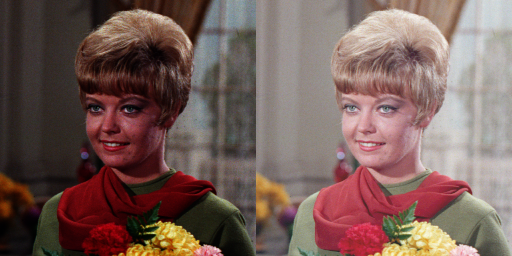

In [129]:
print('Gamma Correction pada citra')
print('---------------------------')

try:
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Images/female.tiff')

gamma_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      gamma_image[y,x,c] = np.clip(255 * pow(original[y,x,c]/255, 1/gamma), 0, 255)

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)


### Nomor 2

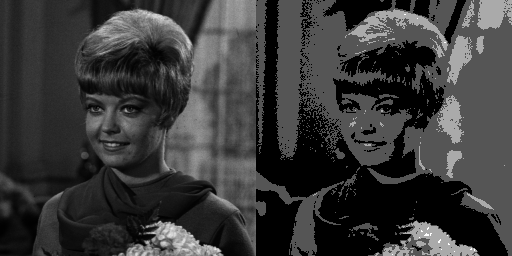

In [109]:
bit_depth = 2
level = 255 / (pow(2, bit_depth)-1)

original2 = cv.imread('/content/drive/MyDrive/Images/female.tiff', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original2.shape, original2.dtype)

#akses per piksel
for y in range(original2.shape[0]):
  for x in range(original2.shape[1]):
    depth_image[y,x] = np.clip(round(original2[y,x]/level) * level, 0, 255)

final_frame2 = cv.hconcat((original2, depth_image))
cv2_imshow(final_frame2)



### Nomor 3

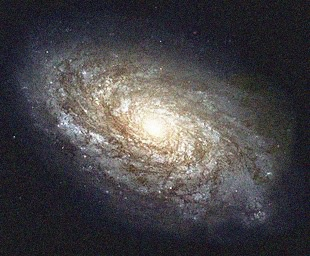

Jumlah citra :  5
Nilai PSNR :  19.52192987568509


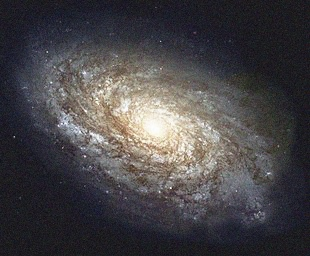

Jumlah citra :  10
Nilai PSNR :  19.727704624413


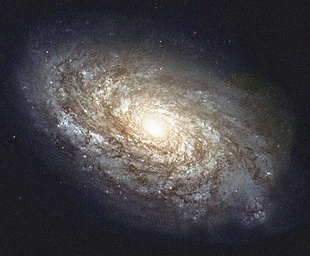

Jumlah citra :  20
Nilai PSNR :  19.84000427466488


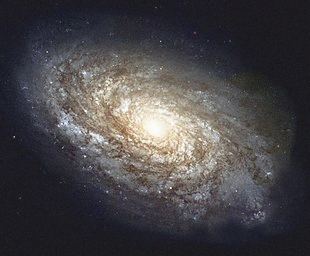

Jumlah citra :  40
Nilai PSNR :  19.894537922945897


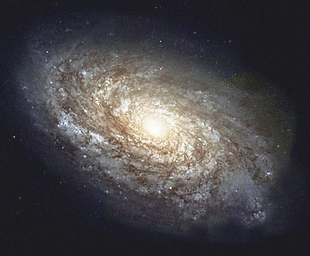

Jumlah citra :  80
Nilai PSNR :  19.916683668689757


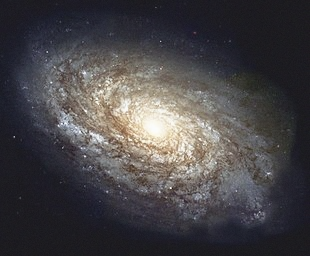

Jumlah citra :  100
Nilai PSNR :  19.92196095594035


In [128]:
original3 = cv.imread('/content/drive/MyDrive/Images/galaxy.jpg')

def PSNR(img1, img2):
  mse = np.mean((img1-img2) ** 2)
  if(mse == 0):
    return 100
  max_pixel=255.0
  psnr = 20 * log10(max_pixel/sqrt(mse))
  return psnr

cv_img=[]
for img in glob.glob('/content/drive/MyDrive/Images/noises/*.jpg'):
  n = cv.imread(img)
  cv_img.append(n)



def noise(jumlah):
  noise_image = np.zeros(cv_img[0].shape)

  for i in range(jumlah):
    noise_image += cv_img[i]

  noise_image = np.uint16(noise_image/jumlah)
  return noise_image

jumlah = [5, 10, 20, 40, 80, 100]
for j in jumlah:
  noise_img = noise(j)
  psnr = PSNR(original3, noise_img)
  cv2_imshow(noise_img)
  print('Jumlah citra : ', j)
  print('Nilai PSNR : ', psnr)


- Kesimpulan nya adalah jika semakin tinggi jumlah gambar dan nilai PSNR, maka noise pada citra semakin rendah

### Nomor 4

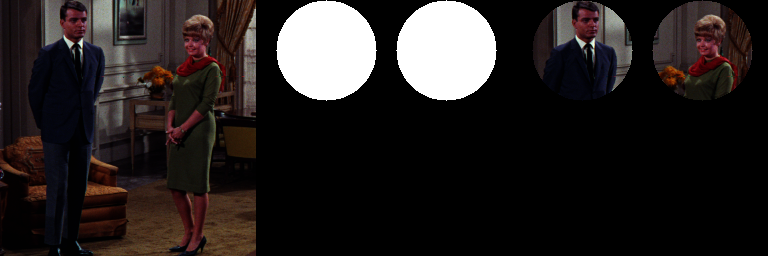

In [119]:
original4 = cv.imread('/content/drive/MyDrive/Images/couple.tiff')

mask = np.zeros(original4.shape, original4.dtype)
cv.circle(mask, (70, 50), 50, (255,255,255),-1)
masked = original4 & mask

cv.circle(mask, (190, 50), 50, (255,255,255),-1)
masked = original4 & mask

final_frame4 = cv.hconcat((original4, mask, masked))
cv2_imshow(final_frame4)


### Nomor 5

#### NOT

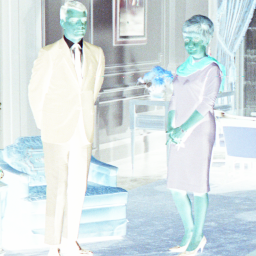

In [116]:
hasil_not = cv.bitwise_not(original4)

cv2_imshow(hasil_not)

#### OR

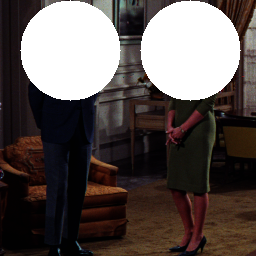

In [126]:
hasil_or = cv.bitwise_or(original4, mask)

cv2_imshow(hasil_or)

#### AND

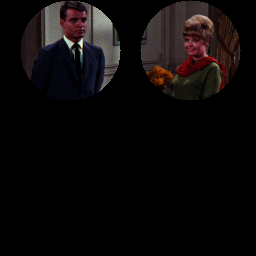

In [125]:
hasil_and = cv.bitwise_and(original4, mask)

cv2_imshow(hasil_and)

#### NAND

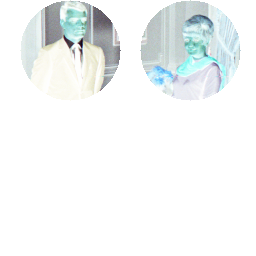

In [123]:
hasil_and = cv.bitwise_and(original4, mask)
hasil_nand = cv.bitwise_not(hasil_and)

cv2_imshow(hasil_nand)

#### XOR

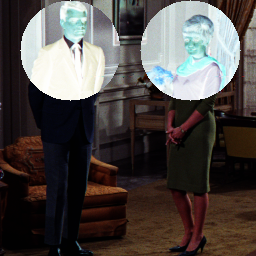

In [124]:
hasil_xor = cv.bitwise_xor(original4, mask)

cv2_imshow(hasil_xor)

#### Hasil analisa:

- hasil citra pada operator not akan menghasilkan warna kebalikan nya / inverse dari warna aslinya

- hasil citra pada operator or akan menghasilkan gambar dan mask yang tumpuk
- hasil citra pada operator and akan menghasilkan irisan kedua citra
- hasil citra pada operator nand akan menghasilkan citra seperti and tetapi warna citra menjadi inverse
- hasil citra pada operator xor akan menghasilkan negasi irisan kedua citra